In [3]:
import pandas as pd

In [4]:
data = pd.read_csv("/Users/ainc/Documents/Police_Department_Incident_Reports__Historical_2003_to_May_2018.csv",
                   parse_dates=['Date'])

In [12]:
def getHour(time):
    return int(time.split(':')[0])
def getMinute(time):
    return int(time.split(':')[1])

In [13]:
data['Hour'] = data.Time.map(getHour)
data['Minute'] = data.Time.map(getMinute)

In [14]:
data.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId,Hour,Minute
0,150060275,NON-CRIMINAL,LOST PROPERTY,Monday,2015-01-19,14:00,MISSION,NONE,18TH ST / VALENCIA ST,-122.421582,37.761701,"(37.7617007179518, -122.42158168137)",15006027571000,14,0
1,150098210,ROBBERY,"ROBBERY, BODILY FORCE",Sunday,2015-02-01,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821003074,15,45
2,150098210,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Sunday,2015-02-01,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821004014,15,45
3,150098210,SECONDARY CODES,DOMESTIC VIOLENCE,Sunday,2015-02-01,15:45,TENDERLOIN,NONE,300 Block of LEAVENWORTH ST,-122.414406,37.784191,"(37.7841907151119, -122.414406029855)",15009821015200,15,45
4,150098226,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM OF VEHICLES",Tuesday,2015-01-27,19:00,NORTHERN,NONE,LOMBARD ST / LAGUNA ST,-122.431119,37.800469,"(37.8004687042875, -122.431118543788)",15009822628160,19,0


### Let's make a jitter-plot (that is, code up something like Figure 2-1 from DAOST from scratch), but based on SF Police data. My hunch from inspecting the file is that the police-folks might be a little bit lazy in noting down the exact time down to the second. So choose a crime-type and a suitable time interval (somewhere between a month and 6 months depending on the crime-type) and create a jitter plot of the arrest times during a single hour (like 13-14, for example).

In [15]:
assaults = data[data['Category'] == 'ASSAULT']

In [17]:
assaults = assaults[(assaults.Date.dt.month < 6) & (assaults.Hour == 13)]

In [19]:
set(assaults.Date.dt.month)

{1, 2, 3, 4, 5}

In [57]:
jitterplot_data = assaults.groupby('Minute')['IncidntNum'].count()

In [5]:
import matplotlib.pyplot as plt
import numpy as np

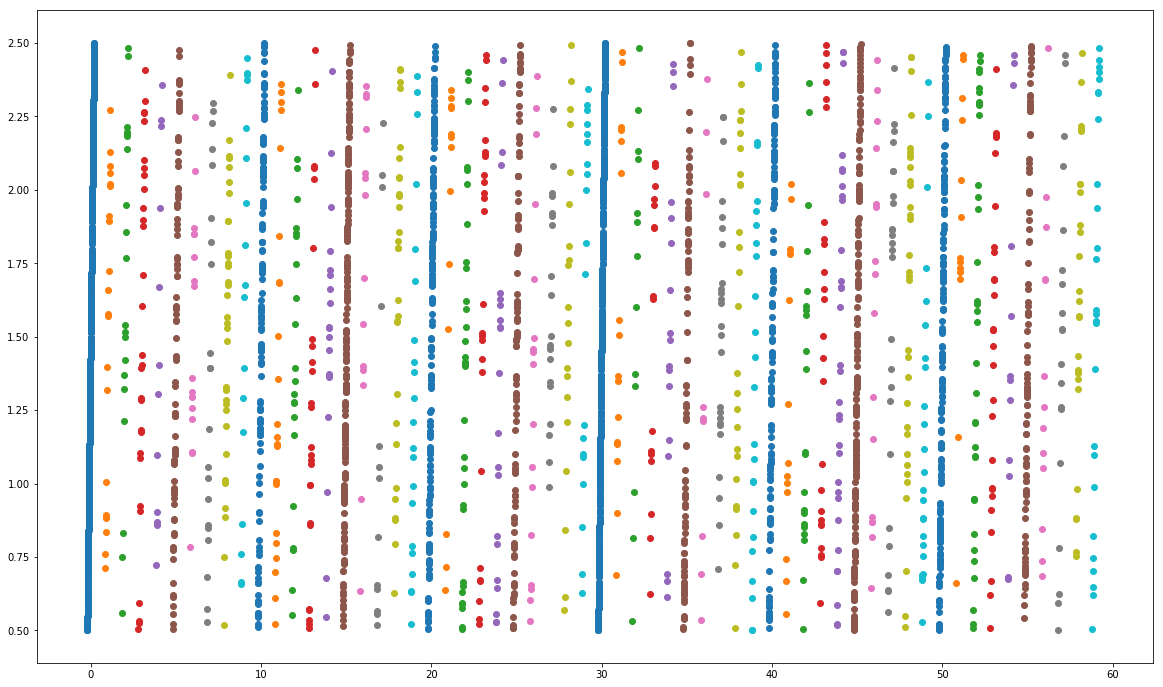

In [28]:
plt.figure(figsize=(20,12))
for i in range(60):
    noise = np.random.rand(jitterplot_data[i])
    x_array = i + noise*0.4 - 0.2
    y_array = 0.5 + noise*2
    plt.scatter(x_array, y_array)

### Last time, we did lots bar-plots. Today, we'll play around with histograms (creating two versions of Figure 2-2). I think the GPS data could be fun to see this way

#### This time, pick two crime-types with different geographical patterns and a suitable time-interval for each (you want between 1000 and 10000 points in your histogram)

In [44]:
filtered = data[(data.Date.dt.month < 6) & ((data.Hour > 0) & (data.Hour < 7))]
prost = filtered[filtered['Category'] == 'PROSTITUTION']
drug = filtered[filtered['Category'] == 'DRUG/NARCOTIC']

3580

#### Then take the latitude part of the GPS coordinates for each crime and bin the latitudes so that you have around 50 bins across the city of SF. You can use your favorite method for binning. I like numpy.histogram -- that gives you the counts and then you do your own plotting.

In [52]:
def histogram(df):
    max_val = df.Y.max()
    min_val = df.Y.min()
    plt.hist(df.Y, bins=np.linspace(min_val, max_val, 50), histtype='step')

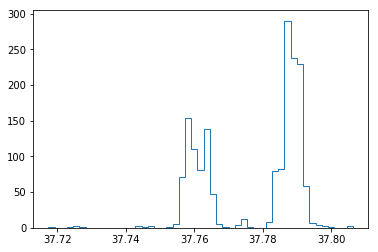

In [53]:
histogram(prost)

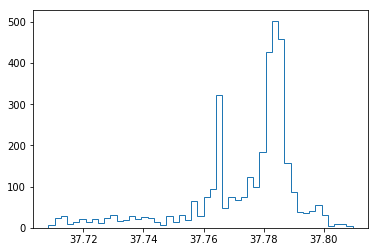

In [54]:
histogram(drug)

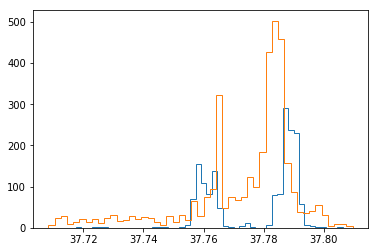

In [55]:
plt.figure()
histogram(prost)
histogram(drug)

### Next up is recreating Figure 2-4 from DAOST, but with the data you used to create Figure 2.1. To create the kernel density plot, you can either use gaussian_kde from scipy.stats (for an example, check out this stackoverflow post) or you can use seaborn.kdeplot.

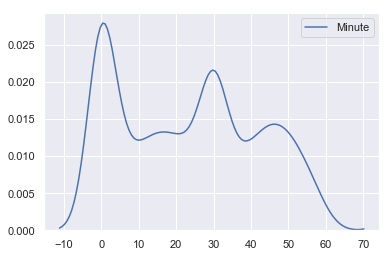

In [65]:
import numpy as np; np.random.seed(10)
import seaborn as sns; sns.set(color_codes=True)
mean, cov = [0, 2], [(1, .5), (.5, 1)]
x, y = np.random.multivariate_normal(mean, cov, size=50).T
ax = sns.kdeplot(assaults['Minute'])

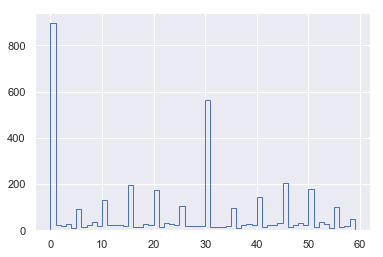

In [75]:
max_val = assaults.Minute.max()
min_val = assaults.Minute.min()
x = plt.hist(assaults.Minute, bins=np.linspace(min_val, max_val, 60), histtype='step')

### Now grab 25 random timepoints from the dataset you've just plotted and create the same Figure 2-4 plot once again. Does this shed light on why I think KDEs can bee misleading?

In [68]:
random_vals = np.random.choice(assaults.Minute, size=25, replace=False)

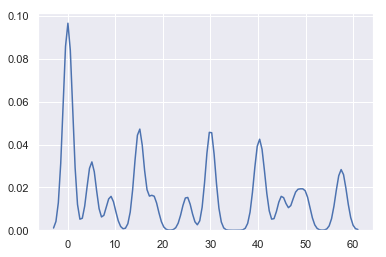

In [79]:
ax = sns.kdeplot(random_vals, bw=1)

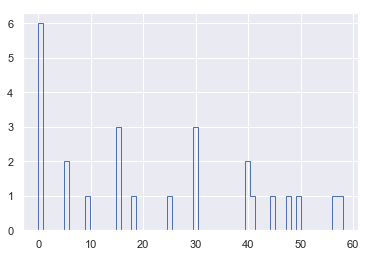

In [76]:
max_val = random_vals.max()
min_val = random_vals.min()
x = plt.hist(random_vals, bins=np.linspace(min_val, max_val, 60), histtype='step')


### Create your own two versions of Figure 2-11, but using the GPS data you used for your version of Figure 2-2. Comment on the result. It is not easy to create this plot from scracth, bHint: Take a look at the scipy.stats.probplot function.

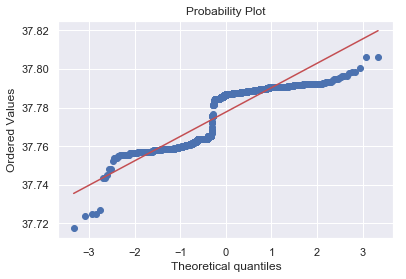

In [81]:
from scipy import stats
x = stats.norm.rvs(loc=0, scale=1, size=len(prost))
res = stats.probplot(prost.Y, plot=plt)
plt.show()

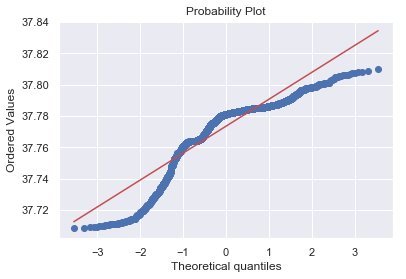

In [82]:
from scipy import stats
x = stats.norm.rvs(loc=0, scale=1, size=len(drug))
res = stats.probplot(drug.Y, plot=plt)
plt.show()

## OK, we're almost done, but we need some box plots. Here, I'd like you to use the box plots to visualize fluctuations of how many crimes happen per day. For the 15 focus crimes defined last week.

In [29]:
focuscrimes = set(['WEAPON LAWS', 'PROSTITUTION', 'DRIVING UNDER THE INFLUENCE', 'ROBBERY', 'BURGLARY', 'ASSAULT', 'DRUNKENNESS', 'DRUG/NARCOTIC', 'TRESPASS', 'LARCENY/THEFT', 'VANDALISM', 'VEHICLE THEFT', 'STOLEN PROPERTY', 'DISORDERLY CONDUCT'])

### For the full time-span of the data, calulate the number of crimes per day within each category for the entire duration of the data. Create a box-and whiskers plot showing the mean, median, quantiles, etc for all 15 crime-types side-by-side. There are many ways to do this, I like to use matplotlibs's built in functionality

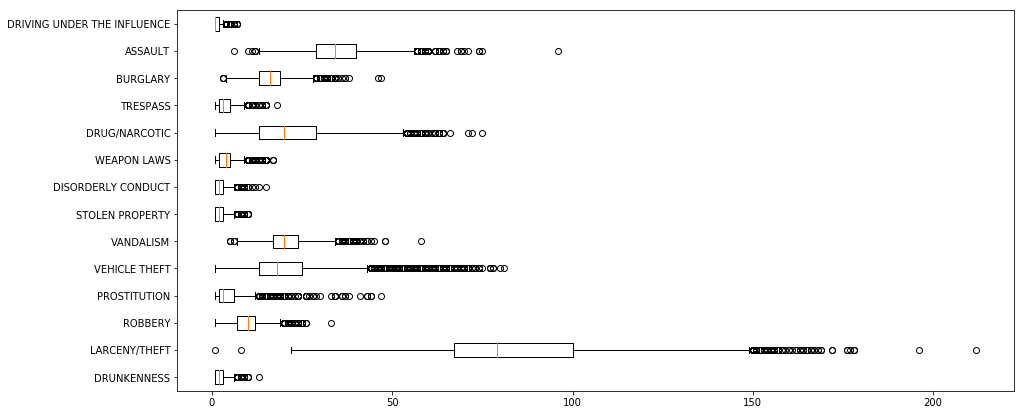

In [53]:
plt.figure(figsize=(15, 7))
categories = set(focuscrimes)
boxplot_arrays = [None] * len(focuscrimes)
for i, category in enumerate(focuscrimes):
    day_values = data[data['Category']==category].groupby('Date')['IncidntNum'].count()
    boxplot_arrays[i]=day_values.values
plot = plt.boxplot(boxplot_arrays, labels = focuscrimes, vert=False)

## Now let's calculate another average for each focus-crime, namely what time of day the crime happens. So this time, the distribution we want to plot is the average time-of-day that a crime takes place.

In [38]:
def secondsFromMidnight(time):
    return int(time.split(":")[0])*60*60 + int(time.split(":")[1])*60

In [39]:
data['SecondsFromMidnight'] = data.Time.map(secondsFromMidnight)

In [44]:
data.SecondsFromMidnight.mean()

49507.938821430376

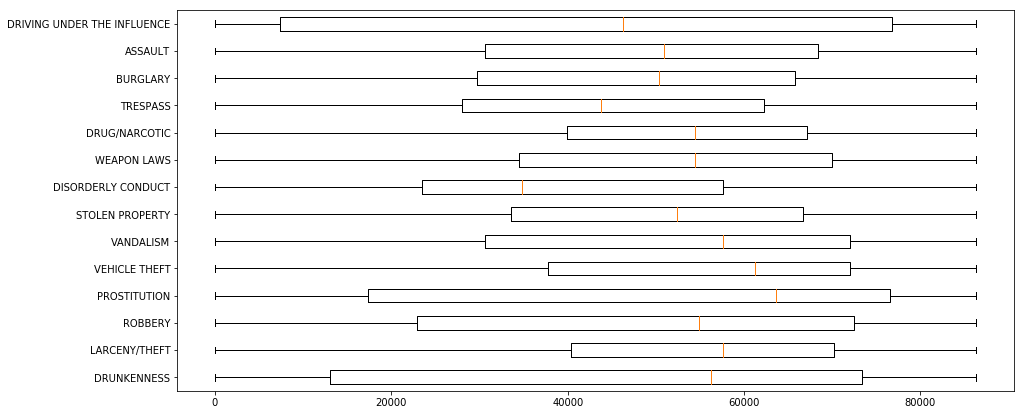

In [50]:
plt.figure(figsize=(15, 7))
categories = set(focuscrimes)
boxplot_arrays = [None] * len(categories)
for i, category in enumerate(categories):
    time_values = data[data['Category']==category].SecondsFromMidnight
    boxplot_arrays[i]=time_values.values
plot = plt.boxplot(boxplot_arrays, labels = categories, vert=False)